# **Weather Prediction**

# **Data Loading**

In [1]:
import pandas as pd


In [2]:
weather = pd.read_csv('3598785.csv', index_col="DATE")
weather

,STATION,NAME,PRCP,SNWD,TAVG,TMAX,TMIN
DATE,,,,,,,
2016-01-01,CA006158355,"TORONTO CITY, ON CA",0.03,NaN,30.0,33.0,27.0
2016-01-02,CA006158355,"TORONTO CITY, ON CA",0.01,0.0,31.0,35.0,27.0
2016-01-03,CA006158355,"TORONTO CITY, ON CA",0.01,0.0,25.0,36.0,14.0
2016-01-04,CA006158355,"TORONTO CITY, ON CA",0.02,NaN,10.0,14.0,6.0
2016-01-05,CA006158355,"TORONTO CITY, ON CA",NaN,NaN,NaN,NaN,8.0
...,...,...,...,...,...,...,...
2024-02-01,CA006158355,"TORONTO CITY, ON CA",0.00,NaN,39.0,41.0,37.0
2024-02-02,CA006158355,"TORONTO CITY, ON CA",0.00,NaN,35.0,41.0,29.0
2024-02-03,CA006158355,"TORONTO CITY, ON CA",0.00,NaN,32.0,37.0,27.0


# **Preparing the Data for Machine Learning**

In [3]:
weather.apply(pd.isnull).sum()

STATION       0
NAME          0
PRCP         75
SNWD       2207
TAVG         31
TMAX         24
TMIN         11
dtype: int64

In [4]:
core_weather = weather[["PRCP","SNWD","TAVG","TMAX","TMIN"]].copy()

In [5]:
core_weather.columns = ["precipitation", "snow_depth", "avg_temperature", "max_temperature", "min_temperature"]
core_weather

,precipitation,snow_depth,avg_temperature,max_temperature,min_temperature
DATE,,,,,
2016-01-01,0.03,NaN,30.0,33.0,27.0
2016-01-02,0.01,0.0,31.0,35.0,27.0
2016-01-03,0.01,0.0,25.0,36.0,14.0
2016-01-04,0.02,NaN,10.0,14.0,6.0
2016-01-05,NaN,NaN,NaN,NaN,8.0
...,...,...,...,...,...
2024-02-01,0.00,NaN,39.0,41.0,37.0
2024-02-02,0.00,NaN,35.0,41.0,29.0
2024-02-03,0.00,NaN,32.0,37.0,27.0


## Filling in  Missing Values

In [6]:
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]

precipitation      0.025580
snow_depth         0.752729
avg_temperature    0.010573
max_temperature    0.008186
min_temperature    0.003752
dtype: float64

In [7]:
core_weather["snow_depth"].value_counts()

snow_depth
0.0     166
0.4     138
0.8      62
1.2      51
1.6      48
3.1      33
2.0      28
2.4      25
2.8      24
3.5      18
3.9      15
4.3      15
5.5      13
6.7      12
5.1      11
4.7       9
7.9       9
8.3       9
5.9       9
7.1       7
6.3       6
7.5       5
8.7       3
9.4       3
9.8       2
11.4      1
12.6      1
11.8      1
9.1       1
Name: count, dtype: int64

In [8]:
del core_weather["snow_depth"]

In [9]:
core_weather[pd.isnull(core_weather["precipitation"])]

,precipitation,avg_temperature,max_temperature,min_temperature
DATE,,,,
2016-01-05,NaN,NaN,NaN,8.0
2016-01-08,NaN,NaN,NaN,32.0
2016-01-25,NaN,36.0,41.0,32.0
2016-01-26,NaN,40.0,45.0,35.0
2016-01-30,NaN,32.0,44.0,20.0
...,...,...,...,...
2018-07-13,NaN,NaN,87.0,NaN
2018-07-15,NaN,NaN,88.0,NaN
2018-12-17,NaN,NaN,NaN,NaN


In [10]:
core_weather["precipitation"].value_counts()

precipitation
0.00    1606
0.01     188
0.02     125
0.04     101
0.03      75
        ... 
1.42       1
0.84       1
1.31       1
2.29       1
1.23       1
Name: count, Length: 122, dtype: int64

In [11]:
core_weather["precipitation"] = core_weather["precipitation"].fillna(0.017)

In [12]:
core_weather[pd.isnull(core_weather["avg_temperature"])]

,precipitation,avg_temperature,max_temperature,min_temperature
DATE,,,,
2016-01-05,0.017,NaN,NaN,8.0
2016-01-08,0.017,NaN,NaN,32.0
2016-04-14,0.017,NaN,NaN,35.0
2016-04-23,0.017,NaN,NaN,38.0
2016-04-26,0.017,NaN,43.0,NaN
2016-04-27,0.017,NaN,NaN,36.0
2016-06-25,0.017,NaN,83.0,NaN
2016-08-12,0.017,NaN,NaN,77.0
2016-08-17,0.017,NaN,80.0,NaN


In [13]:
core_weather = core_weather.fillna(method = "ffill")

In [14]:
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]

precipitation      0.0
avg_temperature    0.0
max_temperature    0.0
min_temperature    0.0
dtype: float64

In [15]:
core_weather

,precipitation,avg_temperature,max_temperature,min_temperature
DATE,,,,
2016-01-01,0.030,30.0,33.0,27.0
2016-01-02,0.010,31.0,35.0,27.0
2016-01-03,0.010,25.0,36.0,14.0
2016-01-04,0.020,10.0,14.0,6.0
2016-01-05,0.017,10.0,14.0,8.0
...,...,...,...,...
2024-02-01,0.000,39.0,41.0,37.0
2024-02-02,0.000,35.0,41.0,29.0
2024-02-03,0.000,32.0,37.0,27.0


## Verifying we have the Correct Data Types 

In [16]:
core_weather.dtypes

precipitation      float64
avg_temperature    float64
max_temperature    float64
min_temperature    float64
dtype: object

In [17]:
core_weather.index

Index(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04', '2016-01-05',
       '2016-01-06', '2016-01-07', '2016-01-08', '2016-01-09', '2016-01-10',
       ...
       '2024-01-27', '2024-01-28', '2024-01-29', '2024-01-30', '2024-01-31',
       '2024-02-01', '2024-02-02', '2024-02-03', '2024-02-04', '2024-02-05'],
      dtype='object', name='DATE', length=2932)

In [18]:
core_weather.index = pd.to_datetime(core_weather.index)
core_weather.index

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2024-01-27', '2024-01-28', '2024-01-29', '2024-01-30',
               '2024-01-31', '2024-02-01', '2024-02-02', '2024-02-03',
               '2024-02-04', '2024-02-05'],
              dtype='datetime64[ns]', name='DATE', length=2932, freq=None)

In [19]:
core_weather.apply(lambda x: (x==9999).sum())

precipitation      0
avg_temperature    0
max_temperature    0
min_temperature    0
dtype: int64

# Analysing Data

<Axes: xlabel='DATE'>

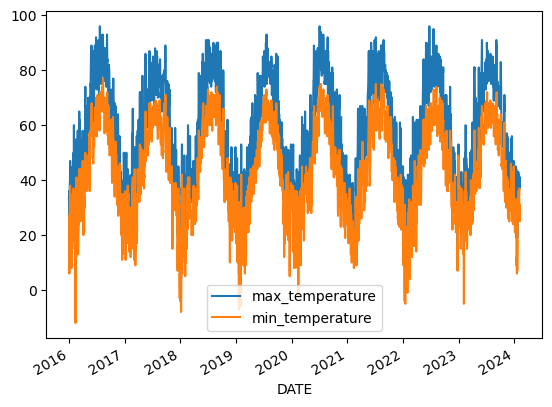

In [20]:
core_weather[["max_temperature", "min_temperature"]].plot()

<Axes: xlabel='DATE'>

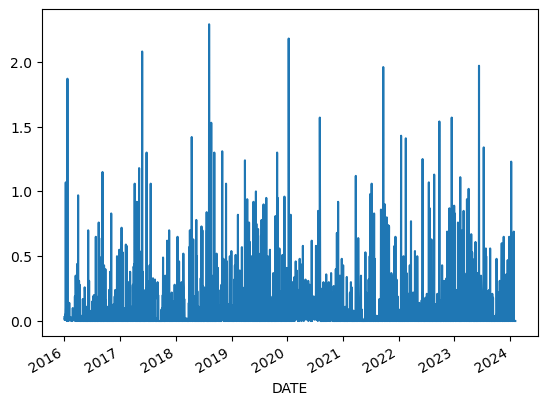

In [21]:
core_weather["precipitation"].plot()

# Training Machine Learning Model

In [22]:
core_weather["Target"] = core_weather.shift(-1)["max_temperature"]

In [23]:
core_weather

,precipitation,avg_temperature,max_temperature,min_temperature,Target
DATE,,,,,
2016-01-01,0.030,30.0,33.0,27.0,35.0
2016-01-02,0.010,31.0,35.0,27.0,36.0
2016-01-03,0.010,25.0,36.0,14.0,14.0
2016-01-04,0.020,10.0,14.0,6.0,14.0
2016-01-05,0.017,10.0,14.0,8.0,36.0
...,...,...,...,...,...
2024-02-01,0.000,39.0,41.0,37.0,41.0
2024-02-02,0.000,35.0,41.0,29.0,37.0
2024-02-03,0.000,32.0,37.0,27.0,41.0


In [24]:
core_weather = core_weather.iloc[:-1,:].copy()
core_weather

,precipitation,avg_temperature,max_temperature,min_temperature,Target
DATE,,,,,
2016-01-01,0.030,30.0,33.0,27.0,35.0
2016-01-02,0.010,31.0,35.0,27.0,36.0
2016-01-03,0.010,25.0,36.0,14.0,14.0
2016-01-04,0.020,10.0,14.0,6.0,14.0
2016-01-05,0.017,10.0,14.0,8.0,36.0
...,...,...,...,...,...
2024-01-31,0.000,39.0,42.0,36.0,41.0
2024-02-01,0.000,39.0,41.0,37.0,41.0
2024-02-02,0.000,35.0,41.0,29.0,37.0


In [25]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=.1)

In [26]:
predictors = ["precipitation", "max_temperature", "min_temperature","avg_temperature"]

In [27]:
train = core_weather.loc[:"2023-10-31"]
test = core_weather.loc["2023-11-1":]

In [28]:
reg.fit(train[predictors], train["Target"])

Ridge(alpha=0.1)

In [29]:
predictions = reg.predict(test[predictors])

In [30]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(test["Target"],predictions)

5.12150012042162

## Evaluating Our Model

In [31]:
combined = pd.concat([test["Target"], pd.Series(predictions, index=test.index)], axis=1)
combined.columns= ["Actual","predictions"]
combined

,Actual,predictions
DATE,,
2023-11-01,48.0,44.286289
2023-11-02,57.0,49.701211
2023-11-03,53.0,59.192506
2023-11-04,51.0,56.200996
2023-11-05,54.0,52.301579
...,...,...
2024-01-31,41.0,46.143170
2024-02-01,41.0,46.077862
2024-02-02,37.0,42.364102


<Axes: xlabel='DATE'>

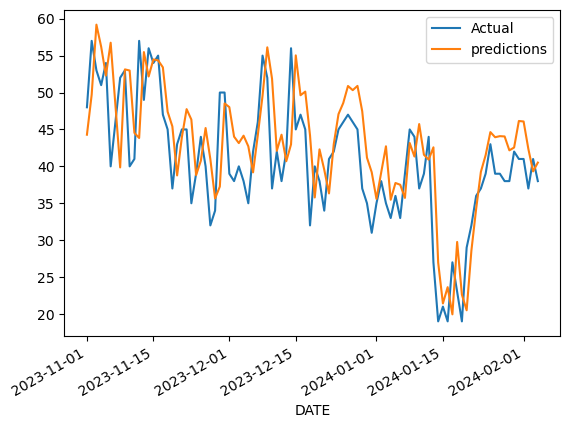

In [32]:
combined.plot()

In [33]:
reg.coef_

array([-4.07292713,  0.61287258,  0.5475649 , -0.16668973])

## Creating function to make Predictions 

In [34]:
def create_predictions(predictors, core_weather, reg):
    train = core_weather.loc[:"2023-10-31"]
    test = core_weather.loc["2023-11-1":]
    reg.fit(train[predictors],train["Target"])
    predictions = reg.predict(test[predictors])
    error = mean_absolute_error(test["Target"],predictions)
    combined = pd.concat([test["Target"], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns= ["Actual","predictions"]
    return error, combined

# Adding in rolling means

In [35]:
core_weather["month_max"] = core_weather["max_temperature"].rolling(30).mean()

In [36]:
core_weather

,precipitation,avg_temperature,max_temperature,min_temperature,Target,month_max
DATE,,,,,,
2016-01-01,0.030,30.0,33.0,27.0,35.0,NaN
2016-01-02,0.010,31.0,35.0,27.0,36.0,NaN
2016-01-03,0.010,25.0,36.0,14.0,14.0,NaN
2016-01-04,0.020,10.0,14.0,6.0,14.0,NaN
2016-01-05,0.017,10.0,14.0,8.0,36.0,NaN
...,...,...,...,...,...,...
2024-01-31,0.000,39.0,42.0,36.0,41.0,34.166667
2024-02-01,0.000,39.0,41.0,37.0,41.0,34.366667
2024-02-02,0.000,35.0,41.0,29.0,37.0,34.466667


In [37]:
core_weather["month_day_max"] = core_weather["month_max"]/core_weather["max_temperature"]

In [38]:
core_weather["max_min"] = core_weather["max_temperature"]/core_weather["min_temperature"]

In [52]:
core_weather['month_day_max'] = core_weather['month_day_max'].astype(float)
core_weather['month_max'] = core_weather['month_max'].astype(float)

In [53]:
core_weather = core_weather.iloc[30:,:].copy()

In [59]:
core_weather.corr()["Target"]

precipitation     -0.028959
avg_temperature    0.936030
max_temperature    0.930412
min_temperature    0.922695
Target             1.000000
month_max          0.874927
month_day_max     -0.331424
max_min           -0.035323
Name: Target, dtype: float64

In [58]:
core_weather["month_max"].dtype

dtype('float64')

In [67]:
predictors = ["precipitation", "max_temperature", "min_temperature","avg_temperature"]

<Axes: xlabel='DATE'>

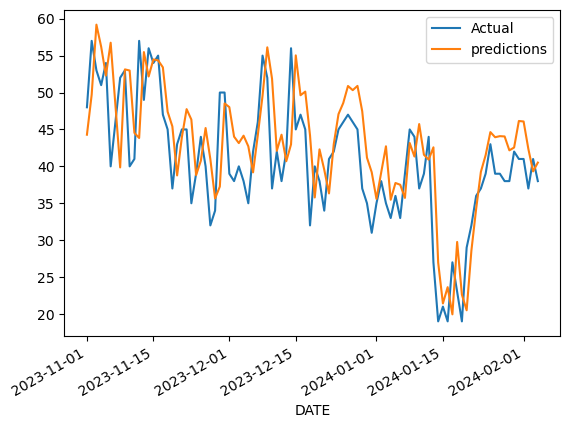

In [68]:
combined.plot()

In [69]:
error,combined = create_predictions(predictors, core_weather, reg)

In [70]:
error

5.110969369453969

<Axes: xlabel='DATE'>

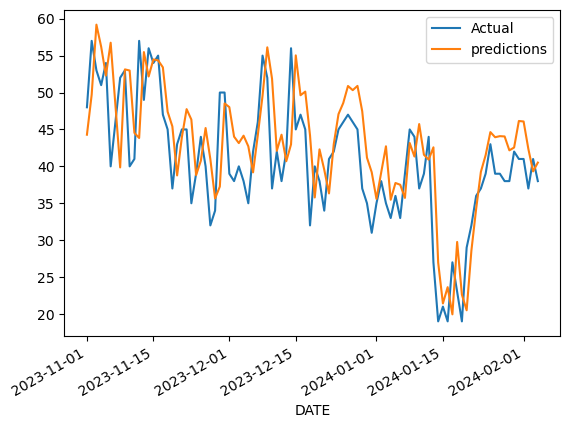

In [62]:
combined.plot()